In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm
from matplotlib.legend_handler import HandlerLine2D

filterwarnings('ignore')


In [2]:
tablet=pd.read_csv('../input/tablet/tablet.csv')
df=tablet.copy()

In [3]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [4]:
df.tail()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


In [5]:
df.shape

(2000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [8]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [9]:
df.corr()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


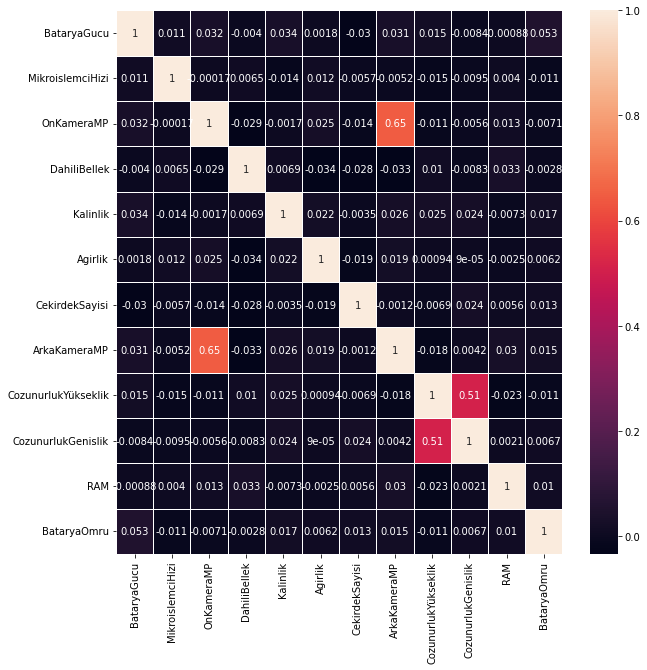

In [10]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=1, ax=ax, xticklabels=True, yticklabels=True);

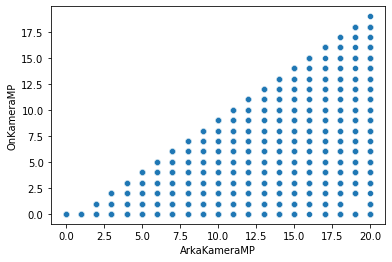

In [11]:
sns.scatterplot(x='ArkaKameraMP', y='OnKameraMP', data=df);

<AxesSubplot:xlabel='CozunurlukGenislik', ylabel='CozunurlukYükseklik'>

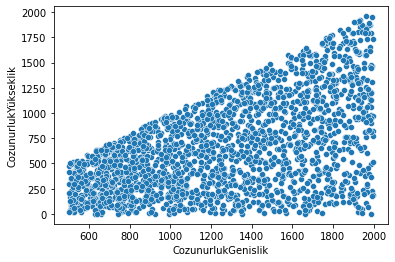

In [12]:
sns.scatterplot(x='CozunurlukGenislik', y='CozunurlukYükseklik', data=df)

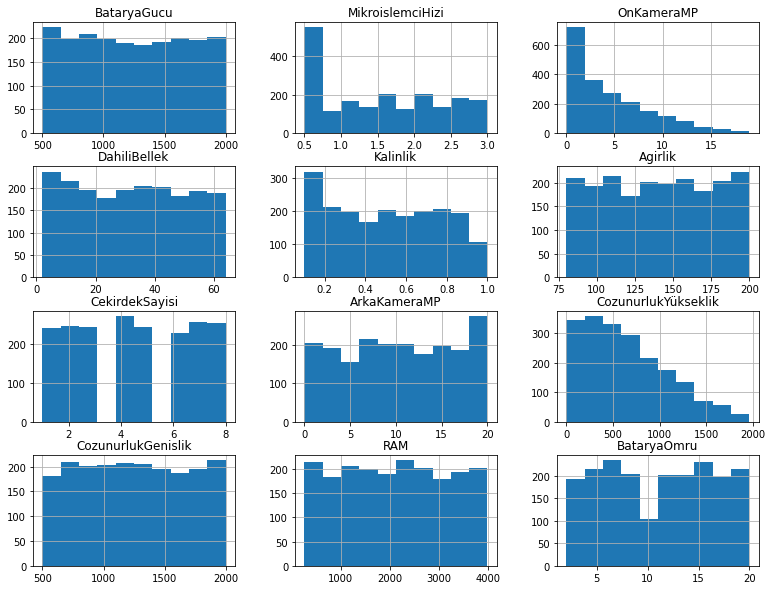

In [13]:
df.hist(figsize=(13,10))
plt.show()

<AxesSubplot:xlabel='FiyatAraligi', ylabel='MikroislemciHizi'>

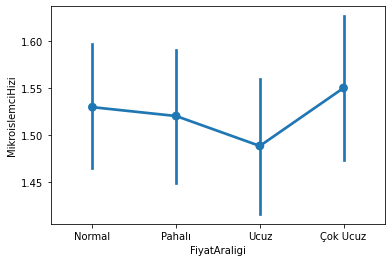

In [14]:
sns.pointplot(x='FiyatAraligi',y='MikroislemciHizi',data=df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='OnKameraMP'>

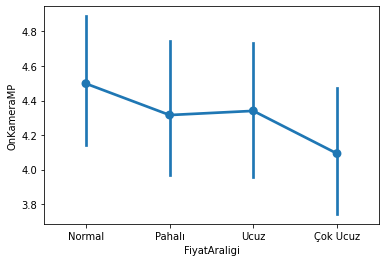

In [15]:
sns.pointplot(x='FiyatAraligi',y='OnKameraMP',data=df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='ArkaKameraMP'>

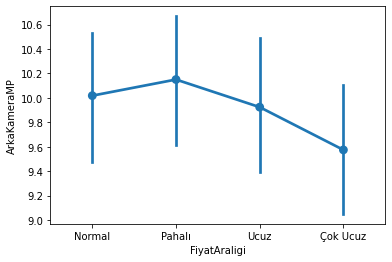

In [16]:
sns.pointplot(x='FiyatAraligi',y='ArkaKameraMP',data=df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='DahiliBellek'>

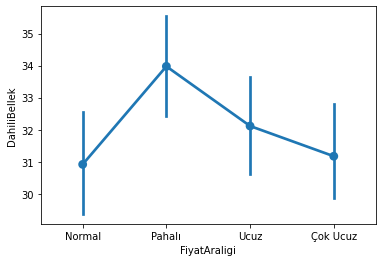

In [17]:
sns.pointplot(x='FiyatAraligi',y='DahiliBellek',data=df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='Agirlik'>

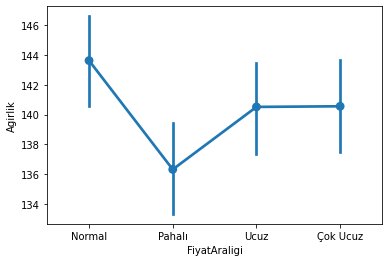

In [18]:
sns.pointplot(x='FiyatAraligi',y='Agirlik',data=df)

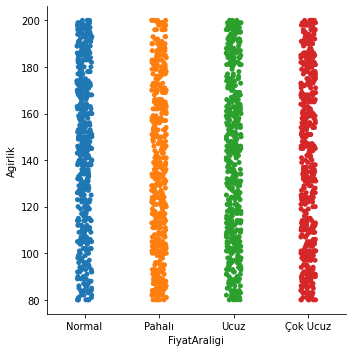

In [19]:
sns.catplot(x='FiyatAraligi',y='Agirlik',data=df)

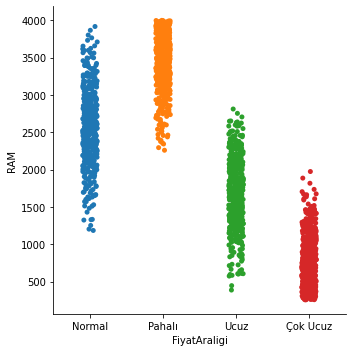

In [20]:
sns.catplot(x='FiyatAraligi',y='RAM',data=df)

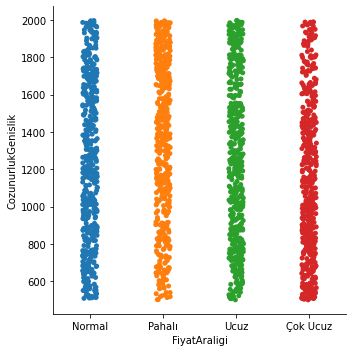

In [21]:
sns.catplot(x='FiyatAraligi',y='CozunurlukGenislik',data=df)

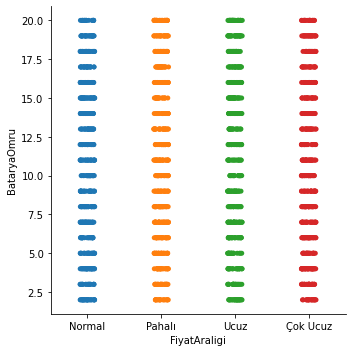

In [22]:
sns.catplot(x='FiyatAraligi',y='BataryaOmru',data=df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

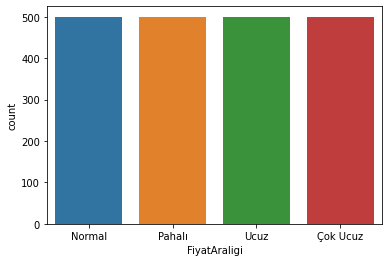

In [23]:
sns.countplot(x='FiyatAraligi',data=df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [25]:
df['Bluetooth'].unique()

array(['Yok', 'Var'], dtype=object)

In [26]:
df['CiftHat'].unique()

array(['Yok', 'Var'], dtype=object)

In [27]:
df['4G'].unique()

array(['Yok', 'Var'], dtype=object)

In [28]:
df['3G'].unique()

array(['Var', 'Yok'], dtype=object)

In [29]:
df['Renk'].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [30]:
df['Renk']=pd.Categorical(df['Renk'])
dfDummies=pd.get_dummies(df['Renk'],prefix='Enc_')
dfDummies

,Enc__Beyaz,Enc__Gri,Enc__Kahverengi,Enc__Kırmızı,Enc__Mavi,Enc__Mor,Enc__Pembe,Enc__Sarı,Enc__Siyah,Enc__Turkuaz,Enc__Turuncu,Enc__Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,0,0
1996,0,0,0,0,0,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,1,0
1998,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
df=pd.concat([df,dfDummies],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   BataryaGucu          2000 non-null   int64   
 1   Bluetooth            2000 non-null   object  
 2   MikroislemciHizi     2000 non-null   float64 
 3   CiftHat              2000 non-null   object  
 4   OnKameraMP           1995 non-null   float64 
 5   4G                   2000 non-null   object  
 6   DahiliBellek         2000 non-null   int64   
 7   Kalinlik             2000 non-null   float64 
 8   Agirlik              2000 non-null   int64   
 9   CekirdekSayisi       2000 non-null   int64   
 10  ArkaKameraMP         2000 non-null   int64   
 11  CozunurlukYükseklik  2000 non-null   int64   
 12  CozunurlukGenislik   2000 non-null   int64   
 13  RAM                  1988 non-null   float64 
 14  BataryaOmru          2000 non-null   int64   
 15  3G                   

In [32]:
df=tablet
df=pd.get_dummies(df,columns=['Renk'], drop_first=True)


In [33]:
label_encoder=preprocessing.LabelEncoder()

In [34]:
df['Bluetooth_Enc']=label_encoder.fit_transform(df['Bluetooth'])
df['CiftHat_Enc']=label_encoder.fit_transform(df['CiftHat'])
df['4G_Enc']=label_encoder.fit_transform(df['4G'])
df['Dokunmatik_Enc']=label_encoder.fit_transform(df['Dokunmatik'])
df['WiFi_Enc']=label_encoder.fit_transform(df['WiFi'])
df=df.drop(['Bluetooth','CiftHat','4G','Dokunmatik','WiFi'],axis=1)
df.head()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil,Bluetooth_Enc,CiftHat_Enc,4G_Enc,Dokunmatik_Enc,WiFi_Enc
0,1325,1.9,2.0,50,0.1,146,1,10,499,695,...,0,0,0,0,0,1,1,1,1,1
1,1046,2.8,0.0,58,0.2,100,8,0,259,1040,...,0,0,0,0,0,0,0,0,0,0
2,843,1.3,1.0,16,0.9,119,7,4,593,732,...,0,0,0,0,0,1,0,1,1,0
3,894,0.5,1.0,50,0.5,199,3,14,1285,1462,...,0,0,0,1,0,1,0,0,1,0
4,936,1.0,1.0,18,0.2,153,3,18,1330,1686,...,0,0,0,0,0,1,1,1,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   MikroislemciHizi     2000 non-null   float64
 2   OnKameraMP           1995 non-null   float64
 3   DahiliBellek         2000 non-null   int64  
 4   Kalinlik             2000 non-null   float64
 5   Agirlik              2000 non-null   int64  
 6   CekirdekSayisi       2000 non-null   int64  
 7   ArkaKameraMP         2000 non-null   int64  
 8   CozunurlukYükseklik  2000 non-null   int64  
 9   CozunurlukGenislik   2000 non-null   int64  
 10  RAM                  1988 non-null   float64
 11  BataryaOmru          2000 non-null   int64  
 12  3G                   2000 non-null   object 
 13  FiyatAraligi         2000 non-null   object 
 14  Renk_Gri             2000 non-null   uint8  
 15  Renk_Kahverengi      2000 non-null   u

In [36]:
df.isna().sum()

BataryaGucu             0
MikroislemciHizi        0
OnKameraMP              5
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
FiyatAraligi            0
Renk_Gri                0
Renk_Kahverengi         0
Renk_Kırmızı            0
Renk_Mavi               0
Renk_Mor                0
Renk_Pembe              0
Renk_Sarı               0
Renk_Siyah              0
Renk_Turkuaz            0
Renk_Turuncu            0
Renk_Yeşil              0
Bluetooth_Enc           0
CiftHat_Enc             0
4G_Enc                  0
Dokunmatik_Enc          0
WiFi_Enc                0
dtype: int64

In [37]:
df['OnKameraMP'].mean()

4.312280701754386

In [38]:
df['OnKameraMP'].fillna(4.312280701754386,inplace=True)

In [39]:
df.isna().sum()

BataryaGucu             0
MikroislemciHizi        0
OnKameraMP              0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
FiyatAraligi            0
Renk_Gri                0
Renk_Kahverengi         0
Renk_Kırmızı            0
Renk_Mavi               0
Renk_Mor                0
Renk_Pembe              0
Renk_Sarı               0
Renk_Siyah              0
Renk_Turkuaz            0
Renk_Turuncu            0
Renk_Yeşil              0
Bluetooth_Enc           0
CiftHat_Enc             0
4G_Enc                  0
Dokunmatik_Enc          0
WiFi_Enc                0
dtype: int64

In [40]:
df['RAM'].mean()

2116.243963782696

In [41]:
df['RAM'].fillna(2116.243963782696,inplace=True)

In [42]:
df.isna().sum()

BataryaGucu            0
MikroislemciHizi       0
OnKameraMP             0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
FiyatAraligi           0
Renk_Gri               0
Renk_Kahverengi        0
Renk_Kırmızı           0
Renk_Mavi              0
Renk_Mor               0
Renk_Pembe             0
Renk_Sarı              0
Renk_Siyah             0
Renk_Turkuaz           0
Renk_Turuncu           0
Renk_Yeşil             0
Bluetooth_Enc          0
CiftHat_Enc            0
4G_Enc                 0
Dokunmatik_Enc         0
WiFi_Enc               0
dtype: int64

In [43]:
df.shape

(2000, 30)

In [44]:
X=df.drop('FiyatAraligi',axis=1)
y=df['FiyatAraligi']

In [45]:
X.shape

(2000, 29)

In [46]:
y.head()

0    Normal
1    Pahalı
2      Ucuz
3    Pahalı
4    Normal
Name: FiyatAraligi, dtype: object

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [48]:
X_train.shape

(1700, 29)

In [49]:
y_train.shape

(1700,)

In [50]:
X_test.shape

(300, 29)

In [51]:
y_test.shape


(300,)